In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
path_to_data = "/eos/user/j/jcapotor/FBGdata/Data/InterrogatorTests/20221222/"

FBGS_FILE1 = "1_spectrum_FBG.txt"
O11_FILE1 = "16_spectrum_OPTICS.txt"

In [89]:
def read_spectrums_fbgs(filename):
    FBGS1 = pd.read_csv(path_to_data + filename, sep="\t", decimal=",", skiprows=9, header=0)
    print("Columns for FBGS data: " + str(FBGS1.columns))
    return FBGS1

In [90]:
def read_spectrums(filename):
    #This function takes the filename with the full path to the data and the channels in list format that must be stored in the dataframe
    #it returns the data contained in the binary spectrum files
    FileId=open(path_to_data + filename,'rb')#open file to be read
    sweeps = []
    persistentRead = True
    cnt = 0
    while persistentRead == True:
        try:
            sweep = {}
            sweep['PacketSize'] = (np.fromfile(FileId, dtype='<i4', count=1))
            sweep['Timestamp'] = (np.fromfile(FileId, dtype='<u8', count=1))
            sweep['Validity flag'] = (np.fromfile(FileId, dtype='<i4', count=1))
            sweep['Channel No.'] = (np.fromfile(FileId, dtype='<i4', count=1))
            sweep['Fibre No.'] = (np.fromfile(FileId, dtype='<i4', count=1))
            sweep['Start wavelength'] = (np.fromfile(FileId, dtype='<d', count=1))
            sweep['Stop wavelength'] = (np.fromfile(FileId, dtype='<d', count=1))
            sweep['No. of wavelength points']=(np.fromfile(FileId, dtype='<i4', count=1))
            sweep['Spectral data']=(np.fromfile(FileId, dtype='<i2', count=sweep['No. of wavelength points'][0]))
            sweep['WL']=np.linspace(sweep['Start wavelength'],sweep['Stop wavelength'],int(sweep['No. of wavelength points']))
            sweeps.append(sweep)
        except:
            persistentRead = False
    sweeps = pd.DataFrame(sweeps)
    sweeps["Timestamp"] = sweeps["Timestamp"].apply(lambda x: np.round(x/1E9,3))
    print("Columns for O11 data: " + str(sweeps.columns))
    # sweeps["Timestamp"] = sweeps["Timestamp"] - sweeps["Timestamp"][0]
    return sweeps

In [91]:
FBGS1 = read_spectrums_fbgs(FBGS_FILE1)
O1 = read_spectrums(O11_FILE1)

Columns for FBGS data: Index(['Wavelength[nm]', 'Ch1[%]'], dtype='object')
Columns for O11 data: Index(['PacketSize', 'Timestamp', 'Validity flag', 'Channel No.', 'Fibre No.',
       'Start wavelength', 'Stop wavelength', 'No. of wavelength points',
       'Spectral data', 'WL'],
      dtype='object')


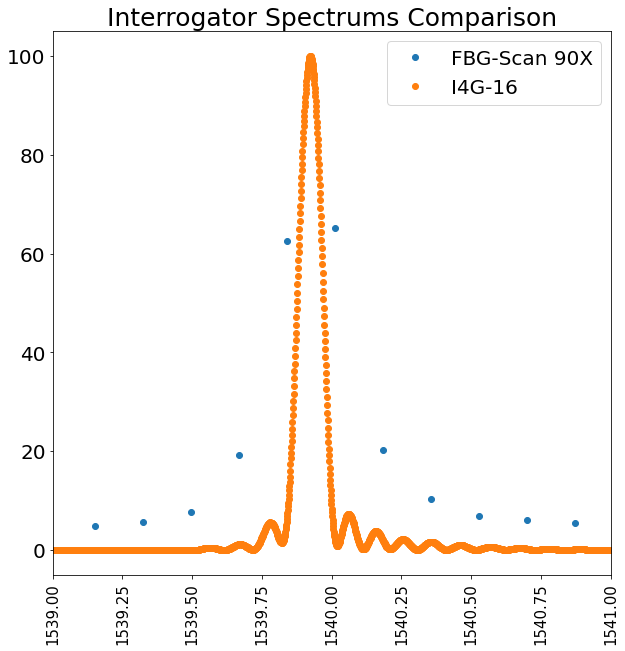

In [120]:
plt.figure(figsize=(10,10))
plt.plot(FBGS1["Wavelength[nm]"], FBGS1["Ch1[%]"], "o", label="FBG-Scan 90X")
plt.plot(O1["WL"][0], O1["Spectral data"][10]/np.max(O1["Spectral data"][10])*100, "o", label="I4G-16")
plt.xlim(1539, 1541)
plt.title("Interrogator Spectrums Comparison", fontsize=25)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [425]:
path_to_data = "/eos/user/j/jcapotor/FBGdata/Data/InterrogatorTests/20221220/"

FBGS_FILE1 = "20221220 154444-Test5_LLumiSense-Wav-CH1.txt"
O11_FILE1 = "Test5_Optics.txt"
RTD_FILE = "Test6_RTD.txt"


In [426]:
def totalseconds_o11(x):
    date, time = x.split(" ")
    h, m, s = time.split(":")
    totalseconds = float(h)*3600 + float(m)*60 + float(s)
    return totalseconds

def totalseconds_fbgs(x):
    h, m, s = x.split(":")
    totalseconds = float(h)*3600 + float(m)*60 + float(s)
    return totalseconds

def read_peaks_FBGS(filename):
    FBGS = pd.read_csv(filename, skiprows=18, decimal=",", sep="\t", header=0)
    FBGS["Time"] = FBGS["Time"].apply(totalseconds_fbgs)
    return FBGS

def read_peaks_O11(filename):
    O11 = pd.read_csv(filename, skiprows=0, sep="\t", header=None)
    O11[0] = O11[0].apply(totalseconds_o11)
    return O11

def read_temperature(filename):
    temp = pd.read_csv(filename, sep="\t", header=None)
    temp.columns = ["Date", "Time", "T1", "T2"]
    temp["Time"] = temp["Time"].apply(totalseconds_fbgs)
    return temp

In [427]:
FBGS = read_peaks_FBGS(path_to_data + FBGS_FILE1)
print(FBGS.columns)
O11 = read_peaks_O11(path_to_data + O11_FILE1)
print(O11.columns)
temp = read_temperature(path_to_data + RTD_FILE)
print(temp.columns)

Index(['Date', 'Time', 'LineNumber', 'System status', 'Wav1-1', 'Wav1-2',
       'Wav1-3', 'Wav1-4', 'Pow1-1', 'Pow1-2', 'Pow1-3', 'Pow1-4'],
      dtype='object')
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')
Index(['Date', 'Time', 'T1', 'T2'], dtype='object')


Text(0, 0.5, 'Wavelength diff wrt initial (pm)')

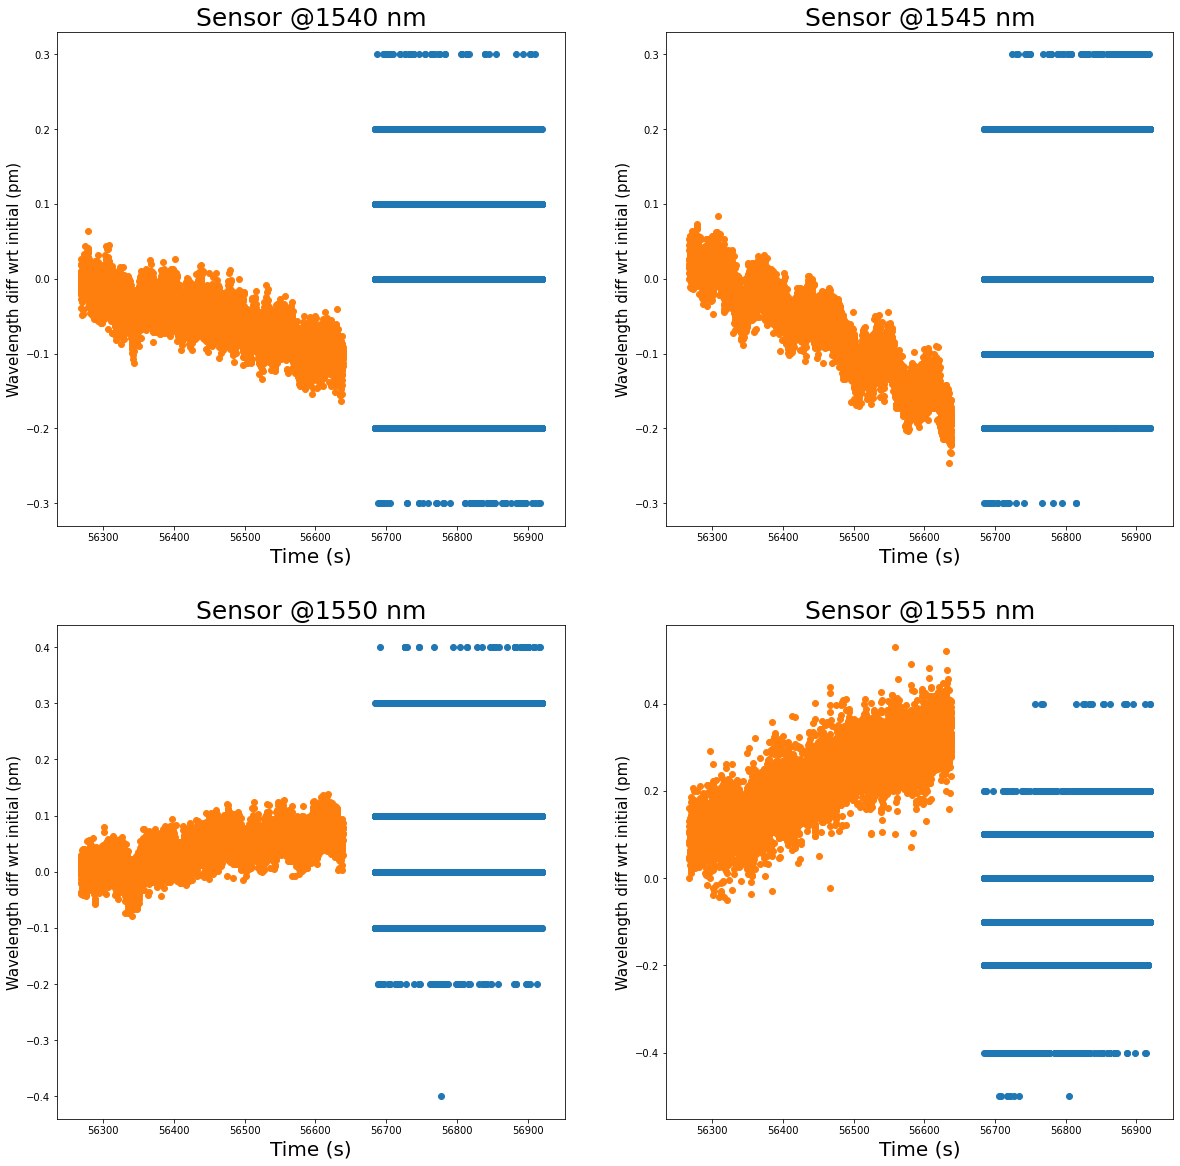

In [428]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(FBGS["Time"], (FBGS["Wav1-1"] - FBGS["Wav1-1"][0])*1e3, "o")
plt.plot(O11[0], (O11[8] - O11[8][0])*1e12, "o")
plt.title("Sensor @1540 nm", fontsize=25)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Wavelength diff wrt initial (pm)", fontsize=15)
plt.subplot(2,2,2)
plt.plot(FBGS["Time"], (FBGS["Wav1-2"] - FBGS["Wav1-2"][0])*1e3, "o")
plt.plot(O11[0], (O11[14] - O11[14][0])*1e12, "o")
plt.title("Sensor @1545 nm", fontsize=25)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Wavelength diff wrt initial (pm)", fontsize=15)
plt.subplot(2,2,3)
plt.plot(FBGS["Time"], (FBGS["Wav1-3"] - FBGS["Wav1-3"][0])*1e3, "o")
plt.plot(O11[0], (O11[20] - O11[20][0])*1e12, "o")
plt.title("Sensor @1550 nm", fontsize=25)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Wavelength diff wrt initial (pm)", fontsize=15)
plt.subplot(2,2,4)
plt.plot(FBGS["Time"], (FBGS["Wav1-4"] - FBGS["Wav1-4"][0])*1e3, "o")
plt.plot(O11[0], (O11[26] - O11[26][0])*1e12, "o")
plt.title("Sensor @1555 nm", fontsize=25)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Wavelength diff wrt initial (pm)", fontsize=15)

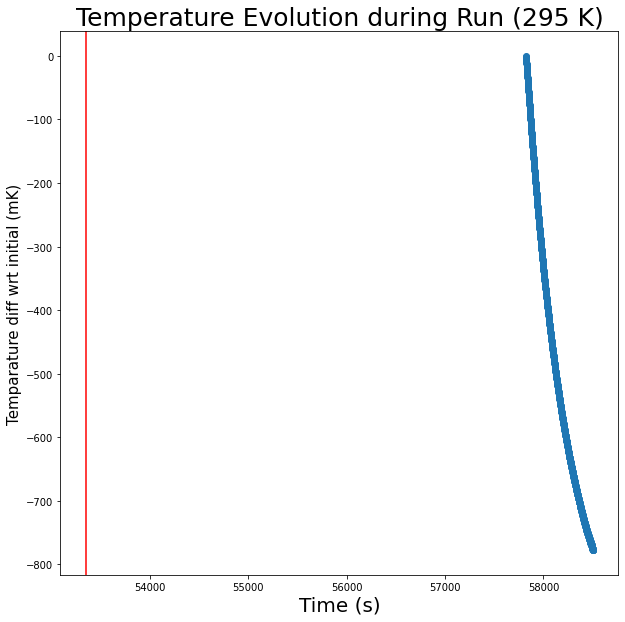

In [429]:
plt.figure(figsize=(10,10))
plt.plot(temp["Time"], (temp["T1"] - temp["T1"][0])*1000, "o")
plt.title("Temperature Evolution during Run (295 K)", fontsize=25)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Temparature diff wrt initial (mK)", fontsize=15)
plt.axvline(x=53350, color="red")

In [430]:
from scipy.optimize import curve_fit
from scipy.stats import norm

In [431]:
def linear(x, A, B):
    return A + B*x

In [432]:
O11_1_params, O11_1_cov = curve_fit(linear, O11[0], (O11[26] - O11[26][0])*1e12)
O11_1_residuals = linear(O11[0], O11_1_params[0], O11_1_params[1]) - (O11[26] - O11[26][0])*1e12
(O11_mu, O11_sigma) = norm.fit(O11_1_residuals)

FBGS_1_params, FBGS_1_cov = curve_fit(linear, FBGS["Time"], (FBGS["Wav1-4"] - FBGS["Wav1-4"][0])*1e3)
FBGS_1_residuals = linear(FBGS["Time"], FBGS_1_params[0], FBGS_1_params[1]) - (FBGS["Wav1-4"] - FBGS["Wav1-4"][0])*1e3
(FBGS_mu, FBGS_sigma) = norm.fit(FBGS_1_residuals)

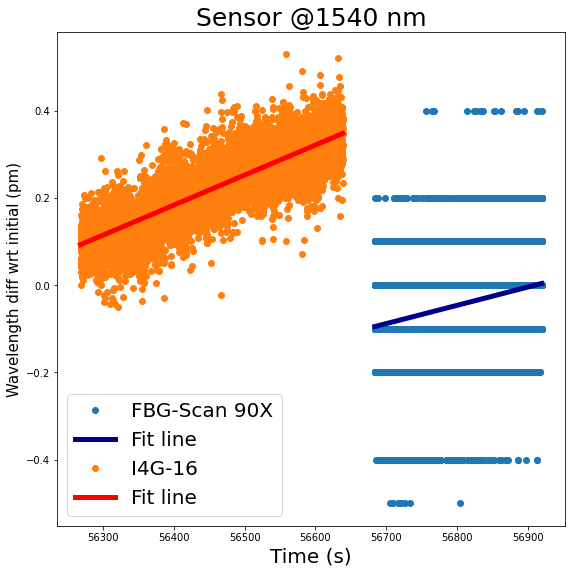

In [433]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.plot(FBGS["Time"], (FBGS["Wav1-4"] - FBGS["Wav1-4"][0])*1e3, "o", label="FBG-Scan 90X")
plt.plot(FBGS["Time"], linear(FBGS["Time"], FBGS_1_params[0], FBGS_1_params[1]), linewidth=5, color="darkblue", label="Fit line")
plt.plot(O11[0], (O11[26] - O11[26][0])*1e12, "o", label="I4G-16")
plt.plot(O11[0], linear(O11[0], O11_1_params[0], O11_1_params[1]), linewidth=5, color="red", label="Fit line")
plt.title("Sensor @1540 nm", fontsize=25)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Wavelength diff wrt initial (pm)", fontsize=15)
plt.legend(fontsize=20)

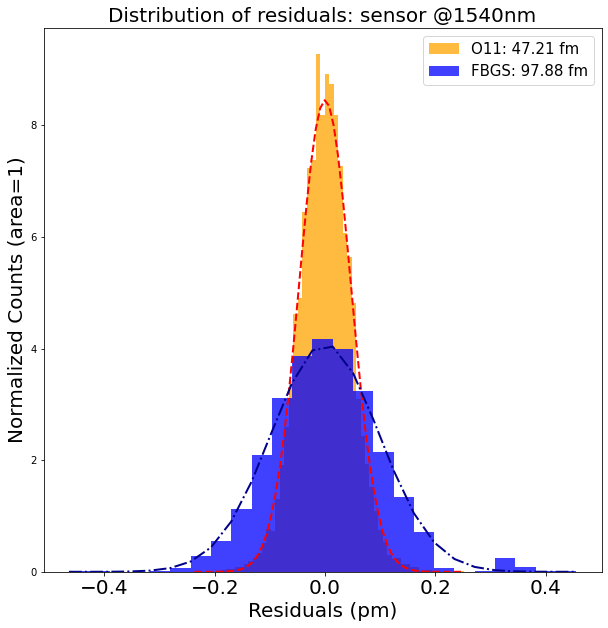

In [434]:
plt.figure(figsize=(10,10))
n, bins_o11, patches = plt.hist(O11_1_residuals, 60, density=True, facecolor='orange', alpha=0.75,
                    label="O11: " + str(np.round(O11_sigma*1000, 2)) + " fm")
y = norm.pdf(bins_o11, O11_mu, O11_sigma)
l = plt.plot(bins_o11, y, 'r--', linewidth=2)

n, bins_fbgs, patches = plt.hist(FBGS_1_residuals, 25, density=True, facecolor='blue', alpha=0.75,
                    label="FBGS: " + str(np.round(FBGS_sigma*1000, 2)) + " fm")
y = norm.pdf(bins_fbgs, FBGS_mu, FBGS_sigma)
l = plt.plot(bins_fbgs, y, "-.", color="darkblue", linewidth=2)
plt.xlabel("Residuals (pm)",fontsize=20)
plt.ylabel("Normalized Counts (area=1)",fontsize=20)
plt.title("Distribution of residuals: sensor @1540nm",fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=15)

In [443]:
FBGS_files = [
    "20221220 145052-Test1_LLumiSense-Wav-CH1.txt",
    "20221220 150330-Test2_LLumiSense-Wav-CH1.txt",
    "20221220 151505-Test3_LLumiSense-Wav-CH1.txt",
    "20221220 153003-Test4_LLumiSense-Wav-CH1.txt",
    "20221220 154444-Test5_LLumiSense-Wav-CH1.txt"
]
O11_files = [
    "Test1_Optics.txt",
    "Test2_Optics .txt",
    "Test3_Optics.txt",
    "Test4_Optics.txt",
    "Test5_Optics.txt"
]

T_files = [
    "Test1_RTD.txt",
    "Test2_RTD.txt",
    "Test3_RTD.txt",
    "Test4_RTD.txt",
    "Test6_RTD.txt",
]

In [444]:
fbgs_results = []
for fbgs_file in FBGS_files:
    fbgs_data = read_peaks_FBGS(path_to_data + fbgs_file)
    fbgs_columns = fbgs_data.columns[4:8]
    results = []
    for col in fbgs_columns:
        popt, pcov = curve_fit(linear, fbgs_data["Time"], fbgs_data[col]*1e3)
        residuals = (linear(fbgs_data["Time"], popt[0], popt[1]) - fbgs_data[col]*1e3)*1E3
        (FBGS_mu, FBGS_sigma) = norm.fit(residuals)
        results.append(FBGS_sigma)
    fbgs_results.append(results)
fbgs_results = pd.DataFrame(fbgs_results)
fbgs_results.columns = ["S1 (fm)", "S2 (fm)", "S3 (fm)", "S4 (fm)"]
fbgs_results.index = ["Run1", "Run2", "Run3", "Run4", "Run5"]
print(fbgs_results)

         S1 (fm)     S2 (fm)     S3 (fm)     S4 (fm)
Run1   97.051140   76.400519  237.877700  687.970272
Run2   82.184626   93.204933   89.511299  110.553467
Run3  102.237927   95.203090   96.176963  114.474002
Run4   91.116462   94.006092   80.240209  117.421180
Run5   96.150587  100.327299   95.914892   97.877205


In [445]:
fbgs_results = []
for fbgs_file in O11_files:
    fbgs_data = read_peaks_O11(path_to_data + fbgs_file)
    fbgs_columns = [8, 14, 20, 26]
    results = []
    for col in fbgs_columns:
        popt, pcov = curve_fit(linear, fbgs_data[0], fbgs_data[col]*1e12)
        residuals = (linear(fbgs_data[0], popt[0], popt[1]) - fbgs_data[col]*1e12)*1E3
        (FBGS_mu, FBGS_sigma) = norm.fit(residuals)
        results.append(FBGS_sigma)
    fbgs_results.append(results)
fbgs_results = pd.DataFrame(fbgs_results)
fbgs_results.columns = ["S1 (fm)", "S2 (fm)", "S3 (fm)", "S4 (fm)"]
fbgs_results.index = ["Run1", "Run2", "Run3", "Run4", "Run5"]
print(fbgs_results)

        S1 (fm)    S2 (fm)    S3 (fm)    S4 (fm)
Run1  27.708730  28.107963  24.546778  53.021818
Run2  22.046098  28.616013  30.110829  49.490686
Run3  22.252098  25.368553  20.034731  44.312189
Run4  23.021469  20.705166  23.316078  46.358645
Run5  20.025508  21.981699  22.972678  47.210276


In [460]:
fbgs_results = []
for fbgs_file in T_files:
    fbgs_data = read_temperature(path_to_data + fbgs_file)
    fbgs_columns = ["T2"]
    results = []
    for col in fbgs_columns:
        results.append(np.mean(fbgs_data[col]))
        results.append((np.max(fbgs_data[col]) - np.min(fbgs_data[col]))*1000)
    fbgs_results.append(results)
fbgs_results = pd.DataFrame(fbgs_results)
fbgs_results.columns = ["Mean T (K)", "dT (mK)"]
fbgs_results.index = ["Run1", "Run2", "Run3", "Run4", "Run5"]
print(fbgs_results)
temp_results = fbgs_results

      Mean T (K)  dT (mK)
Run1  295.039964     9.67
Run2  295.050977    12.72
Run3  295.062333    16.53
Run4  295.076167    12.54
Run5  295.508216   154.74


In [479]:
fbgs_results = []
for fbgs_file in range(len(O11_files)):
    fbgs_data = read_peaks_O11(path_to_data + O11_files[fbgs_file])
    fbgs_columns = [8, 14, 20, 26]
    results = []
    for col in fbgs_columns:
        deltaW = fbgs_data[col].iloc[0] - fbgs_data[col].iloc[-1]
        results.append(deltaW*1E15)
    fbgs_results.append(results)
fbgs_results = pd.DataFrame(fbgs_results)
fbgs_results.columns = ["S1 (fm)", "S2 (fm)", "S3 (fm)", "S4 (fm)"]
fbgs_results.index = ["Run1", "Run2", "Run3", "Run4", "Run5"]
print(fbgs_results)

KeyError: -1

In [478]:
fbgs_results = []
for fbgs_file in range(len(FBGS_files)):
    fbgs_data = read_peaks_FBGS(path_to_data + FBGS_files[fbgs_file])
    fbgs_columns = fbgs_data.columns[4:8]
    results = []
    for col in fbgs_columns:
        deltaW = fbgs_data[col][0] - fbgs_data[col][-1]
        results.append(deltaW*1E6)
    fbgs_results.append(results)
fbgs_results = pd.DataFrame(fbgs_results)
fbgs_results.columns = ["S1 (fm)", "S2 (fm)", "S3 (fm)", "S4 (fm)"]
fbgs_results.index = ["Run1", "Run2", "Run3", "Run4", "Run5"]
print(fbgs_results)

KeyError: -1